## Fix `feature_selection` plots

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

2024-03-07 08:53:02.893795: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('glass', path = data_real_path)

In [15]:
def fix_feat_sel_plot(dataset,model,eval_model,interpretation,scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','fs_plots'),save=True,box_loc=None,rotation=False,plot_image=True,random=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','feature_selection',model,f'{eval_model}_{interpretation}',f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    path_random=os.path.join(experiment_path,dataset.name,'experiments','feature_selection',model,'random',f'scenario_{str(scenario)}')
    file_path_random=get_most_recent_file(path_random)
    if random:
        plot_feature_selection(file_path,plot_path=plot_path,precision_file_random=file_path_random,model=model,eval_model=eval_model,interpretation=interpretation,scenario=scenario,save_image=save,plot_image=plot_image,rotation=rotation)
    else:
        plot_feature_selection(file_path,plot_path=plot_path,model=model,eval_model=eval_model,interpretation=interpretation,scenario=scenario,save_image=save,plot_image=plot_image,rotation=rotation)

In [30]:
path=os.path.join(experiment_path,dataset.name,'experiments','feature_selection','EIF+','EIF+_EXIFFI+',f'scenario_{str(1)}')
#path=os.path.join(experiment_path,dataset.name,'experiments','feature_selection','EIF+','random',f'scenario_{str(1)}')
file_path=get_most_recent_file(path)
file_path

'/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/glass/experiments/feature_selection/EIF+/EIF+_EXIFFI+/scenario_1/05-03-2024_17-32-27_.pickle'

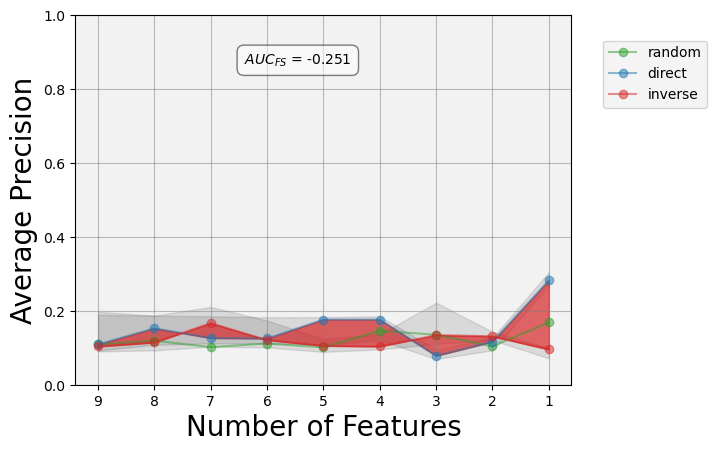

In [32]:
fix_feat_sel_plot(dataset,'EIF+','EIF+','EXIFFI+',1,save=True,plot_image=True)

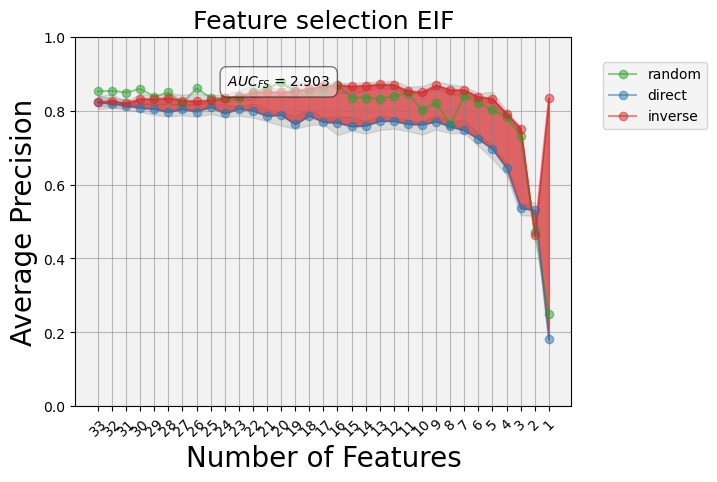

In [14]:
fix_feat_sel_plot(dataset,'EIF','EXIFFI',1,save=True,plot_image=True,rotation=True)

## Fix `imp_plots`

### TO DO - Replace the `AUC_FS` box for the `feature_selection` plots of `breastw`

In [6]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

In [7]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('glass_DIFFI', path = data_real_path)

In [8]:
dataset.shape

(214, 9)

In [9]:
def fix_bar_plot(dataset,model,interpretation,scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','imp_plots'),save=True,plot_image=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','global_importances',model,interpretation,f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    bar_plot(dataset,file_path,plot_path=plot_path,model=model,interpretation=interpretation,scenario=scenario,save_image=save,show_plot=plot_image)

def fix_score_plot(dataset,model,interpretation,scenario,plot_path=os.path.join(experiment_path,dataset.name,'plots_new','imp_plots'),save=True,plot_image=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','global_importances',model,interpretation,f'scenario_{str(scenario)}')
    file_path=get_most_recent_file(path)
    score_plot(dataset,file_path,plot_path=plot_path,model=model,interpretation=interpretation,scenario=scenario,save_image=save,show_plot=plot_image)

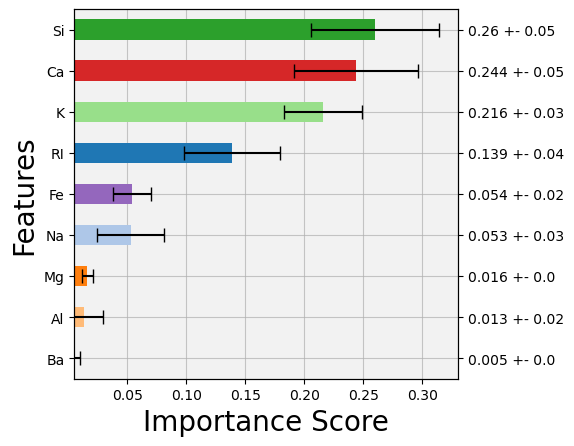

In [23]:
fix_bar_plot(dataset,'IF','RandomForest',1,save=True,plot_image=False)
plt.close()
fix_score_plot(dataset,'IF','RandomForest',1,save=True,plot_image=False)

## Fix `AUC_FS` box

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import namedtuple

In [2]:
os.chdir('../experiments/results')
models=['IF']
interpretations=['RandomForest']
scenarios=[2]
dataset_names_syn=['Xaxis','Yaxis','bisect','bisect_3d','bisect_6d']
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
dataset_names_real=['moodify']
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'

Synthetic Datasets

In [3]:
for data in dataset_names_syn:
    dataset = Dataset(data, path = data_syn_path)
    for model in models:
        for interpretation in interpretations:
            if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
                continue
            elif (model=='IF') and (interpretation=='EXIFFI'):
                continue
            else:
                for scenario in scenarios:
                    fix_fs_file(dataset,model,interpretation,scenario)

In [4]:
path=os.path.join(os.getcwd(),dataset.name,'experiments','feature_selection','IF','RandomForest',f'scenario_{str(2)}')
file_path=get_most_recent_file(path)
open_element(file_path)

NewPrecisions(direct=array([[0.09090909, 0.09001009, 0.08827264, 0.09090909, 0.08913119,
        0.09090909, 0.08743305, 0.09090909, 0.08913115, 0.09090909],
       [0.09090909, 0.09090909, 0.08913397, 0.09001024, 0.09001058,
        0.09090909, 0.09001057, 0.09090909, 0.09001062, 0.09090909],
       [0.08913791, 0.09090909, 0.0891356 , 0.09001183, 0.09090909,
        0.09001156, 0.09001152, 0.0900114 , 0.09090909, 0.08745685],
       [0.09001241, 0.09090909, 0.08914174, 0.09090909, 0.0882972 ,
        0.08913957, 0.09090909, 0.0882956 , 0.09090909, 0.09090909],
       [0.09001282, 0.09001263, 0.08914141, 0.09001247, 0.09001277,
        0.08914103, 0.08829603, 0.08914167, 0.08914066, 0.09001266],
       [0.08747248, 0.08441495, 0.08665914, 0.08365088, 0.08914272,
        0.09001379, 0.08050409, 0.08511923, 0.09001285, 0.09001302]]), inverse=array([[0.09001003, 0.08913131, 0.09090909, 0.09090909, 0.09090909,
        0.08827173, 0.09001024, 0.09090909, 0.09090909, 0.09090909],
       [0.

Real Datasets

In [ ]:
for data in dataset_names_real:
    dataset = Dataset(data, path = data_real_path)
    for model in models:
        for interpretation in interpretations:
            if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
                continue
            elif (model=='IF') and (interpretation=='EXIFFI'):
                continue
            else:
                for scenario in scenarios:
                    fix_fs_file(dataset,model,interpretation,scenario)

In [ ]:
dataset=Dataset('bisect_3d',path=data_syn_path)

In [ ]:
aucfs_vals=[]
value_vals=[]
for model in models:
    for interpretation in interpretations:
        if (model=='EIF+' or model=='EIF') and interpretation=='DIFFI':
            continue
        elif (model=='IF') and (interpretation=='EXIFFI'):
            continue
        else:
            for scenario in scenarios:
                value_vals.append(get_fs_file(dataset,model,interpretation,scenario).value)
                aucfs_vals.append(get_fs_file(dataset,model,interpretation,scenario).aucfs)


`cardio`

In [ ]:
dataset = Dataset('ionosphere', path = data_real_path)

In [ ]:
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

`diabetes` and `shuttle`

In [ ]:
dataset = Dataset('shuttle', path = data_real_path)

In [ ]:
fix_fs_file(dataset,'EIF+','RandomForest',2)
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

`moodify`

In [ ]:
fix_fs_file(dataset,'IF','RandomForest',1)
fix_fs_file(dataset,'IF','RandomForest',2)

## `contamination` plots

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import namedtuple

2024-03-05 11:54:16.477912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
def fix_contamination_plot(dataset,model,save=True,change_ylim=False,plot_image=True):
    path=os.path.join(experiment_path,dataset.name,'experiments','contamination',model)
    file_path=get_most_recent_file(path)
    prec=open_element(file_path)[0]
    path_plots=os.path.join(experiment_path,dataset.name,'plots_new/contamination_plots')
    plot_precision_over_contamination(prec,dataset.name,model,path_plots,save_image=save,plot_image=plot_image,change_ylim=change_ylim)

In [4]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('breastw', path = data_real_path)

In [14]:
dataset_names=['glass','cardio','pima','ionosphere','annthyroid','pendigits','diabetes','shuttle','moodify']
for data in dataset_names:
    dataset = Dataset(data, path = data_real_path)
    fix_contamination_plot(dataset,'EIF+','EXIFFI+',2,save=True,plot_image=False,change_ylim=False)
    plt.close()

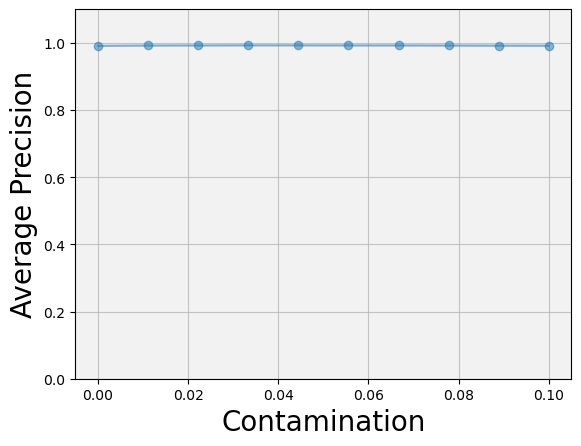

In [12]:
fix_contamination_plot(dataset,'IF',save=True,plot_image=True,change_ylim=True)

In [17]:
dataset_names_syn=['bisect','bisect_3d','bisect_6d']
for data in dataset_names_syn:
    dataset = Dataset(data, path = data_syn_path)
    fix_contamination_plot(dataset,'EIF+','EXIFFI+',2,save=True,plot_image=False,change_ylim=True)
    plt.close()

`plot_feature_selection`

In [ ]:
def print_plt_title(dataset_name,model,interpretation,scenario):
    t = time.localtime()
    current_time = time.strftime("%d-%m-%Y_%H-%M-%S", t)
    namefile = "/" + current_time + "_" + dataset_name + "_" + model + "_" + interpretation + "_feature_selection_" + str(scenario) + ".pdf"
    return namefile

In [ ]:
print_plt_title('breastw','EIF+','EXIFFI',2)

'/28-02-2024_10-04-29_breastw_EIF+_EXIFFI_feature_selection_2.pdf'

## Fix `time.pickle` file

In [20]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *

In [21]:
os.chdir('../utils_reboot')
with open(os.getcwd() + "/new_time.pickle", "rb") as file:
    dict_time = pickle.load(file)

In [3]:
dict_time.keys()

dict_keys(['fit', 'predict', 'importances'])

In [11]:
dict_time['fit'].keys()

dict_keys(['EIF+', 'IF', 'DIF', 'EIF', 'sklearn_IF', 'AnomalyAutoencoder'])

In [12]:
dict_time['predict'].keys()

dict_keys(['EIF+', 'IF', 'DIF', 'EIF', 'sklearn_IF', 'AnomalyAutoencoder'])

In [13]:
dict_time['importances'].keys()

dict_keys(['EXIFFI+', 'EXIFFI', 'DIFFI', 'RandomForest'])

In [14]:
dict_time['fit']['DIF'].keys()

dict_keys(['glass', 'wine', 'cardio', 'annthyroid', 'breastw'])

In [7]:
dict_time['fit']['AnomalyAutoencoder'].keys()

dict_keys(['glass', 'wine', 'cardio', 'annthyroid'])

In [28]:
dict_time['fit']['AnomalyAutoencoder']['moodify'][:5]

[16.097925186157227,
 15.9665207862854,
 17.66091752052307,
 16.25440216064453,
 16.66019058227539]

In [21]:
dict_time['importances']['RandomForest'].keys()

dict_keys(['Xaxis', 'Yaxis', 'bisect', 'bisect_3d', 'bisect_6d', 'wine'])

In [8]:
my_dict = {'a': 1, 'b': 2}

# Using setdefault on an existing key
value_a = my_dict.setdefault('a', 10)
print(value_a) 


1


In [9]:
# Using setdefault on a new key
value_c = my_dict.setdefault('c', 30)
print(value_c)  # Output: 30 (default value for new key 'c')

print(my_dict)

30
{'a': 1, 'b': 2, 'c': 30}


## Doubt on `AutoEncoder`

In [1]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *
import sklearn

2024-03-05 15:17:14.366150: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('moodify', path = data_real_path)

In [5]:
dataset.downsample(max_samples=7500)
1-dataset.perc_outliers

downsampled to  7500


0.8474666666666667

`hidden_neurons=[(dataset.X.shape[1])/2, 32, 32, (dataset.X.shape[1])/2]`

In [3]:
I = AutoEncoder(hidden_neurons=[(dataset.X.shape[1])/2, 32, 32, (dataset.X.shape[1])/2], contamination=0.1, epochs=100, random_state=42,verbose=0)
dataset.split_dataset()
dataset.pre_process()
I.fit(dataset.X_train)

2024-03-05 07:28:25.112553: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


4/4 [==============================] - 0s 1ms/step


AutoEncoder()

In [4]:
y_pred=I.predict(dataset.X)
prec=sklearn.metrics.average_precision_score(dataset.y,y_pred)

5/5 [==============================] - 0s 2ms/step


In [5]:
prec

0.07691029900332226

`hidden_neurons=[(dataset.X.shape[1]), 32, 32, (dataset.X.shape[1])]`

In [7]:
I = AutoEncoder(hidden_neurons=[(dataset.X.shape[1]), 32, 32, (dataset.X.shape[1])], contamination=0.1, epochs=100, random_state=42,verbose=0)
dataset.split_dataset()
dataset.pre_process()
I.fit(dataset.X_train)

4/4 [==============================] - 0s 2ms/step


AutoEncoder()

In [8]:
y_pred=I.predict(dataset.X)
prec=sklearn.metrics.average_precision_score(dataset.y,y_pred)
prec

5/5 [==============================] - 0s 2ms/step


0.07810077519379845

`hidden_neurons=[(dataset.X.shape[1])/5, 32, 32, (dataset.X.shape[1])/5]`

In [9]:
I = AutoEncoder(hidden_neurons=[(dataset.X.shape[1])/5, 32, 32, (dataset.X.shape[1])/5], contamination=0.1, epochs=100, random_state=42,verbose=0)
dataset.split_dataset()
dataset.pre_process()
I.fit(dataset.X_train)

4/4 [==============================] - 0s 1ms/step


AutoEncoder()

In [10]:
y_pred=I.predict(dataset.X)
prec=sklearn.metrics.average_precision_score(dataset.y,y_pred)
prec

5/5 [==============================] - 0s 2ms/step


0.07691029900332226

`hidden_neurons=[(dataset.X.shape[1]), 16, 16, (dataset.X.shape[1])]`

In [3]:
I = AutoEncoder(hidden_neurons=[(dataset.X.shape[1])/10, 16, 16, (dataset.X.shape[1])/10], contamination=0.1, epochs=100, random_state=42,verbose=0)
dataset.split_dataset()
dataset.pre_process()
I.fit(dataset.X_train)
y_pred=I.predict(dataset.X)
prec=sklearn.metrics.average_precision_score(dataset.y,y_pred)
prec

2024-03-05 07:33:58.179926: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


5/5 [==============================] - 0s 1ms/step


0.07691029900332226

`pima` dataset

In [1]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *
import sklearn

2024-03-05 07:52:50.945439: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('diabetes', path = data_real_path)

In [30]:
dim_train=0.8*dataset.X.shape[0]
dataset.split_dataset()

In [32]:
np.linspace(0,0.1,10)

array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ])

In [37]:
dataset = Dataset('glass', path = data_real_path)
dataset.perc_outliers

array([0.04205607])

In [38]:
dataset.split_dataset(train_size=0.8,contamination=0.08)
dataset.y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [39]:
dataset.split_dataset(train_size=0.8,contamination=0.1)
dataset.y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

`DIF` Training

In [55]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *
import sklearn
from pyod.models.dif import DIF

In [59]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('pima', path = data_real_path)

In [60]:
dataset.shape

(768, 8)

## `glass_DIFFI` dataset

In [1]:
import os
import sys
sys.path.append('../')
import pickle
from utils_reboot.utils import *
from utils_reboot.datasets import *

2024-03-06 16:57:52.789856: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_syn_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn/'
data_real_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/'
experiment_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'
dataset = Dataset('glass_DIFFI', path = data_real_path)

In [2]:
with open('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/data_DIFFI/glass_DIFFI.pkl', 'rb') as input:
    data = pickle.load(input)
data.keys()

dict_keys(['X_in', 'y_in', 'X_out_5', 'y_out_5', 'X_out_6', 'y_out_6', 'X_out_7', 'y_out_7'])

In [3]:
X_in=data['X_in']
X_in=np.r_[X_in,data['X_out_5'],data['X_out_6']]
X_out=data['X_out_7']

In [4]:
X_in.shape,X_out.shape

((185, 9), (29, 9))

In [6]:
y_in=np.zeros(X_in.shape[0])
y_out=np.ones(X_out.shape[0])
y=np.concatenate((y_in,y_out)).astype(int)
y.shape

(214,)

In [8]:
X=np.r_[X_in,X_out]
X.shape

(214, 9)

In [9]:
X=np.c_[X,y]
X.shape

(214, 10)

In [10]:
data=pd.DataFrame(X)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0.0


In [11]:
data=data.rename(columns={data.columns[-1]: 'Target'})
data.head()

,0,1,2,3,4,5,6,7,8,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0.0


In [13]:
data.to_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/glass_DIFFI.csv',index=False)

In [9]:
data=pd.read_csv('/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/glass_DIFFI.csv')
data.head()

,0,1,2,3,4,5,6,7,8,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0.0


In [22]:
datapath='/home/davidefrizzo/Desktop/PHD/ExIFFI/data/real/diabetes.csv'
T = pd.read_csv(datapath)
if 'Unnamed: 0' in T.columns:
    T = T.drop(columns=['Unnamed: 0'])
X = T.loc[:,T.columns != "Target"].to_numpy(float)
y = T.loc[:,"Target"].to_numpy(float)

In [23]:
T.head()

,age,bmi,HbA1c_level,blood_glucose_level,Target
0,80.0,25.19,6.6,140,0
1,54.0,27.32,6.6,80,0
2,28.0,27.32,5.7,158,0
3,36.0,23.45,5.0,155,0
4,76.0,20.14,4.8,155,0


In [24]:
X.shape

(100000, 4)